In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [19]:
df=df[['Amount','Class']]
df['Amount']=pd.to_numeric(df['Amount'],errors='coerce')
df['Amount']=df['Amount'].fillna(df['Amount'].mean())
df['Class'].fillna(0,inplace=True)
print(df)

       Amount  Class
0      149.62    0.0
1        2.69    0.0
2      378.66    0.0
3      123.50    0.0
4       69.99    0.0
...       ...    ...
25832    1.00    0.0
25833   42.33    0.0
25834    1.79    0.0
25835   70.75    0.0
25836   49.95    0.0

[25837 rows x 2 columns]


/tmp/ipython-input-4013939181.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].fillna(0,inplace=True)


the accuracy is : 0.8782894736842105


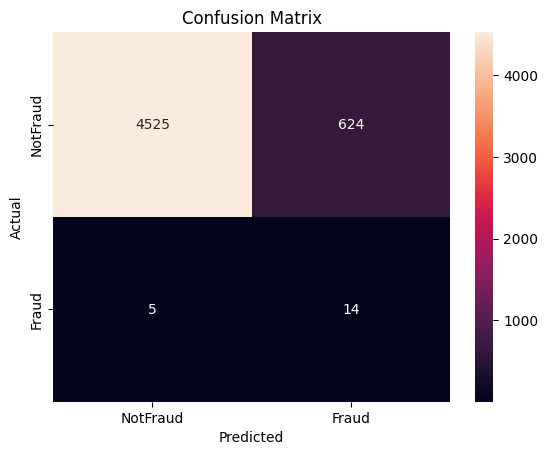

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      5149
         1.0       0.02      0.74      0.04        19

    accuracy                           0.88      5168
   macro avg       0.51      0.81      0.49      5168
weighted avg       1.00      0.88      0.93      5168



In [17]:
x=df.drop(columns='Class',axis=1)
y=df['Class']
df.dropna(subset=['Amount', 'Class'], inplace=True)
x=df.drop(columns='Class',axis=1)
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
smote=SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)
scalar=StandardScaler()
x_train_resampled=scalar.fit_transform(x_train_resampled)
x_test_scaled=scalar.transform(x_test)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train_resampled,y_train_resampled)
pred=model.predict(x_test_scaled)
print("the accuracy is :",accuracy_score(y_test,pred))
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,fmt='d',xticklabels=['NotFraud','Fraud'],yticklabels=['NotFraud','Fraud'],annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test,pred))